In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
train=pd.read_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/train.csv')
test=pd.read_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/test.csv')

In [5]:
import numpy as np

# Convertir todo a string temporalmente para detectar valores raros
train = train.astype(str).apply(lambda col: col.str.strip())

# Reemplazar ? y -9.0 (en cualquier formato) por NaN
train = train.replace(
    to_replace=[r'^\?$', r'^-9\.0$'],
    value=np.nan,
    regex=True
)


In [ ]:
print(train.head(10))

    age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0  51.0  1.0  1.0    125.0  213.0  0.0     2.0   125.0   1.0     1.4   1.0   
1  54.0  1.0  3.0    120.0  237.0  0.0     0.0   150.0   1.0     1.5   NaN   
2  63.0  1.0  4.0      140      0  NaN     2.0     149     0       2     1   
3  52.0  0.0  2.0    140.0    NaN  0.0     0.0   140.0   0.0     0.0   NaN   
4  55.0  1.0  4.0    140.0  217.0  0.0     0.0   111.0   1.0     5.6   3.0   
5  44.0  1.0  4.0    120.0  169.0  0.0     0.0   144.0   1.0     2.8   3.0   
6  35.0  1.0  2.0    122.0  192.0  0.0     0.0   174.0   0.0     0.0   1.0   
7  62.0  1.0  4.0      135    297    0     0.0     130     1       1     2   
8  68.0  1.0  4.0      135      0    0     1.0     120     1       0     1   
9  50.0  1.0  4.0    140.0  231.0  0.0     1.0   140.0   1.0     5.0   2.0   

    ca thal label  
0  1.0  3.0     0  
1  NaN  7.0     2  
2  NaN  NaN     2  
3  NaN  NaN     0  
4  0.0  7.0     3  
5  0.0  6.0     2  
6

In [6]:
# Convertimos a float por si acaso
train["chol"] = pd.to_numeric(train["chol"], errors='coerce')
train["trestbps"] = pd.to_numeric(train["trestbps"], errors='coerce')

# Contar 0 o -9.0
filas_chol = ((train["chol"] == 0) | (train["chol"] == -9)).sum()
filas_trestbps = ((train["trestbps"] == 0) | (train["trestbps"] == -9)).sum()

print(f"Filas con 0 o -9 en 'chol': {filas_chol}")
print(f"Filas con 0 o -9 en 'trestbps': {filas_trestbps}")

Filas con 0 o -9 en 'chol': 135
Filas con 0 o -9 en 'trestbps': 1


In [7]:
cols_categoricas = ['sex', 'cp', 'restecg']

for col in cols_categoricas:
    # Convertir a número, valores inválidos pasan a NaN
    train[col] = pd.to_numeric(train[col], errors='coerce')

    # Convertir a Int64 para mantener NaN y enteros
    train[col] = train[col].astype('Int64')

In [8]:
cols_binarias = ['fbs', 'slope', 'exang']

for col in cols_binarias:
    # Convertir a float, manejar errores convirtiendo lo que no se pueda a NaN
    train[col] = pd.to_numeric(train[col], errors='coerce')

    # Convertir a Int64 para mantener los NaN
    train[col] = train[col].astype('Int64')


In [ ]:
for col in train.columns:
    na_count = train[col].isna().sum()
    na_pct = train[col].isna().mean() * 100
    print(f"{col}: {na_count} {na_pct:.2f}%")


age: 0 0.00%
sex: 0 0.00%
cp: 0 0.00%
trestbps: 47 6.42%
chol: 21 2.87%
fbs: 66 9.02%
restecg: 0 0.00%
thalach: 44 6.01%
exang: 44 6.01%
oldpeak: 56 7.65%
slope: 247 33.74%
ca: 479 65.44%
thal: 379 51.78%
label: 0 0.00%


In [9]:
import numpy as np
import pandas as pd

# Convertir todo a string y quitar espacios
train = train.astype(str).apply(lambda col: col.str.strip())

# Reemplazar números negativos por NaN
train = train.replace(r'^-\d+(\.\d+)?$', np.nan, regex=True)

# Forzar conversión a numérico donde se pueda
train = train.apply(pd.to_numeric, errors='coerce')



In [ ]:
train.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1.0,3.0,0
1,54.0,1,3,120.0,237.0,0,0,150.0,1,1.5,<NA>,nan,7.0,2
2,63.0,1,4,140.0,0.0,<NA>,2,149,0,2,1,nan,nan,2
3,52.0,0,2,140.0,nan,0,0,140.0,0,0.0,<NA>,nan,nan,0
4,55.0,1,4,140.0,217.0,0,0,111.0,1,5.6,3,0.0,7.0,3
5,44.0,1,4,120.0,169.0,0,0,144.0,1,2.8,3,0.0,6.0,2
6,35.0,1,2,122.0,192.0,0,0,174.0,0,0.0,1,0.0,3.0,0
7,62.0,1,4,135.0,297.0,0,0,130,1,1,2,nan,nan,2
8,68.0,1,4,135.0,0.0,0,1,120,1,0,1,nan,7,3
9,50.0,1,4,140.0,231.0,0,1,140.0,1,5.0,2,nan,nan,4


In [ ]:
# Guardar el dataset limpio
train.to_csv('/content/drive/MyDrive/EDEM IA/IA_predictiva/IA_project/Data/Train/train_comprobar.csv', index=False)


In [10]:
# Convertimos a string temporalmente
train['oldpeak'] = train['oldpeak'].astype(str).str.strip()

# Agregamos un 0 delante si empieza con punto
train['oldpeak'] = train['oldpeak'].apply(lambda x: '0'+x if x.startswith('.') else x)

# Convertimos de nuevo a número (float)
train['oldpeak'] = pd.to_numeric(train['oldpeak'], errors='coerce')


In [ ]:
print(train.head(20))

     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   51.0    1   1     125.0  213.0  0.0        2    125.0    1.0      1.4   
1   54.0    1   3     120.0  237.0  0.0        0    150.0    1.0      1.5   
2   63.0    1   4     140.0    0.0  NaN        2    149.0    0.0      2.0   
3   52.0    0   2     140.0    NaN  0.0        0    140.0    0.0      0.0   
4   55.0    1   4     140.0  217.0  0.0        0    111.0    1.0      5.6   
5   44.0    1   4     120.0  169.0  0.0        0    144.0    1.0      2.8   
6   35.0    1   2     122.0  192.0  0.0        0    174.0    0.0      0.0   
7   62.0    1   4     135.0  297.0  0.0        0    130.0    1.0      1.0   
8   68.0    1   4     135.0    0.0  0.0        1    120.0    1.0      0.0   
9   50.0    1   4     140.0  231.0  0.0        1    140.0    1.0      5.0   
10  38.0    1   3     100.0    0.0  NaN        0    179.0    0.0      NaN   
11  64.0    1   4     120.0  246.0  0.0        2     96.0    1.0      2.2   

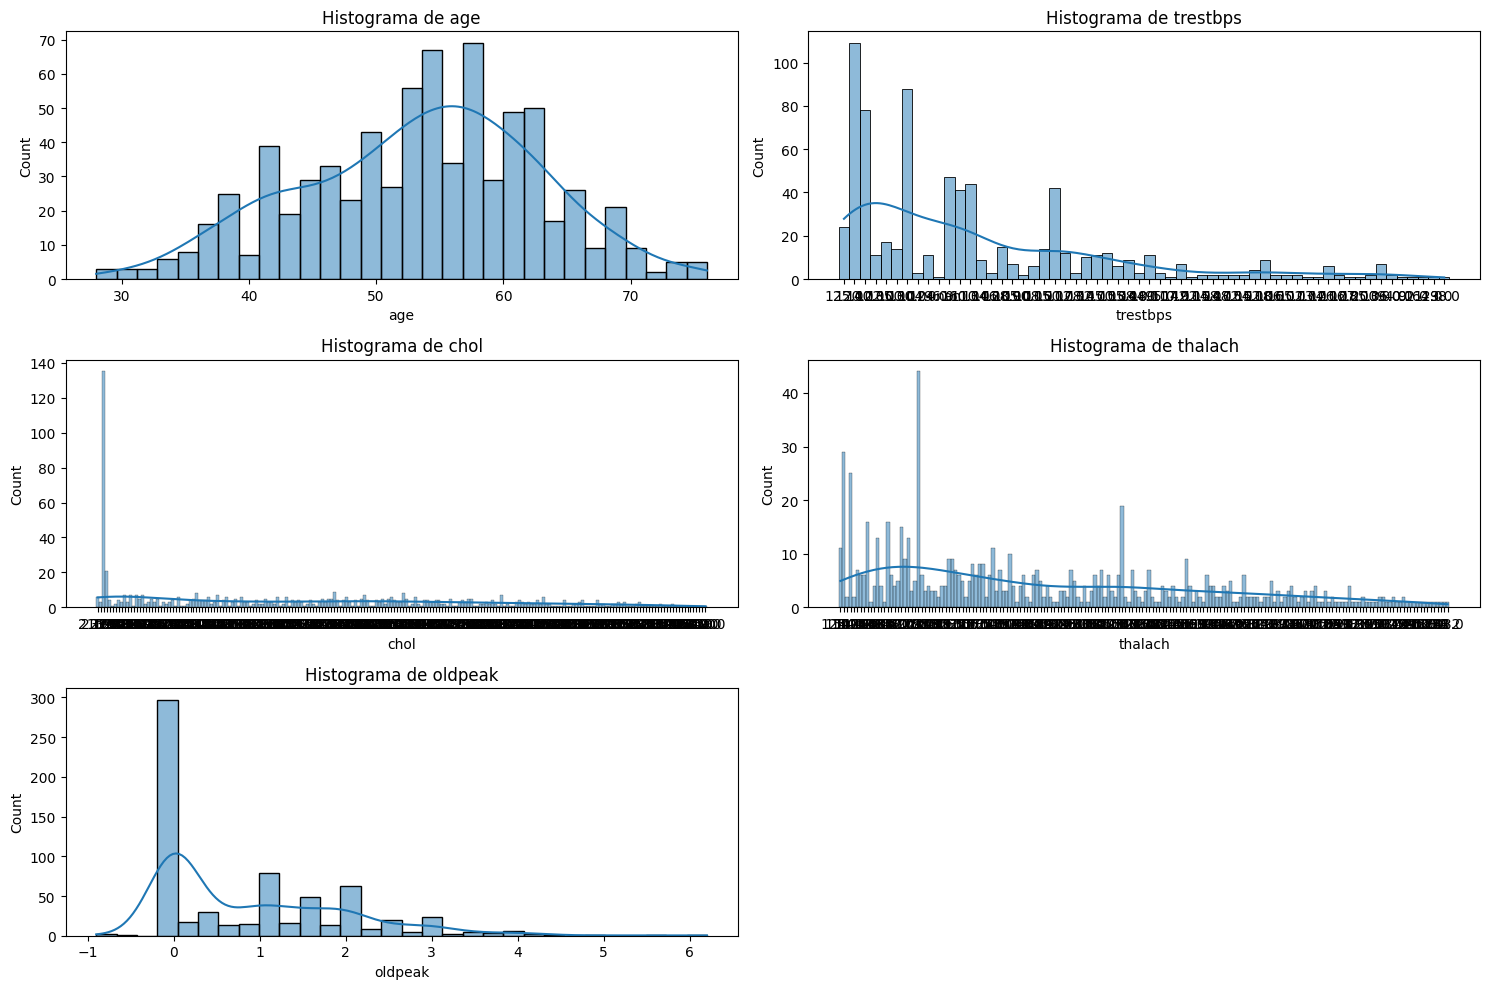

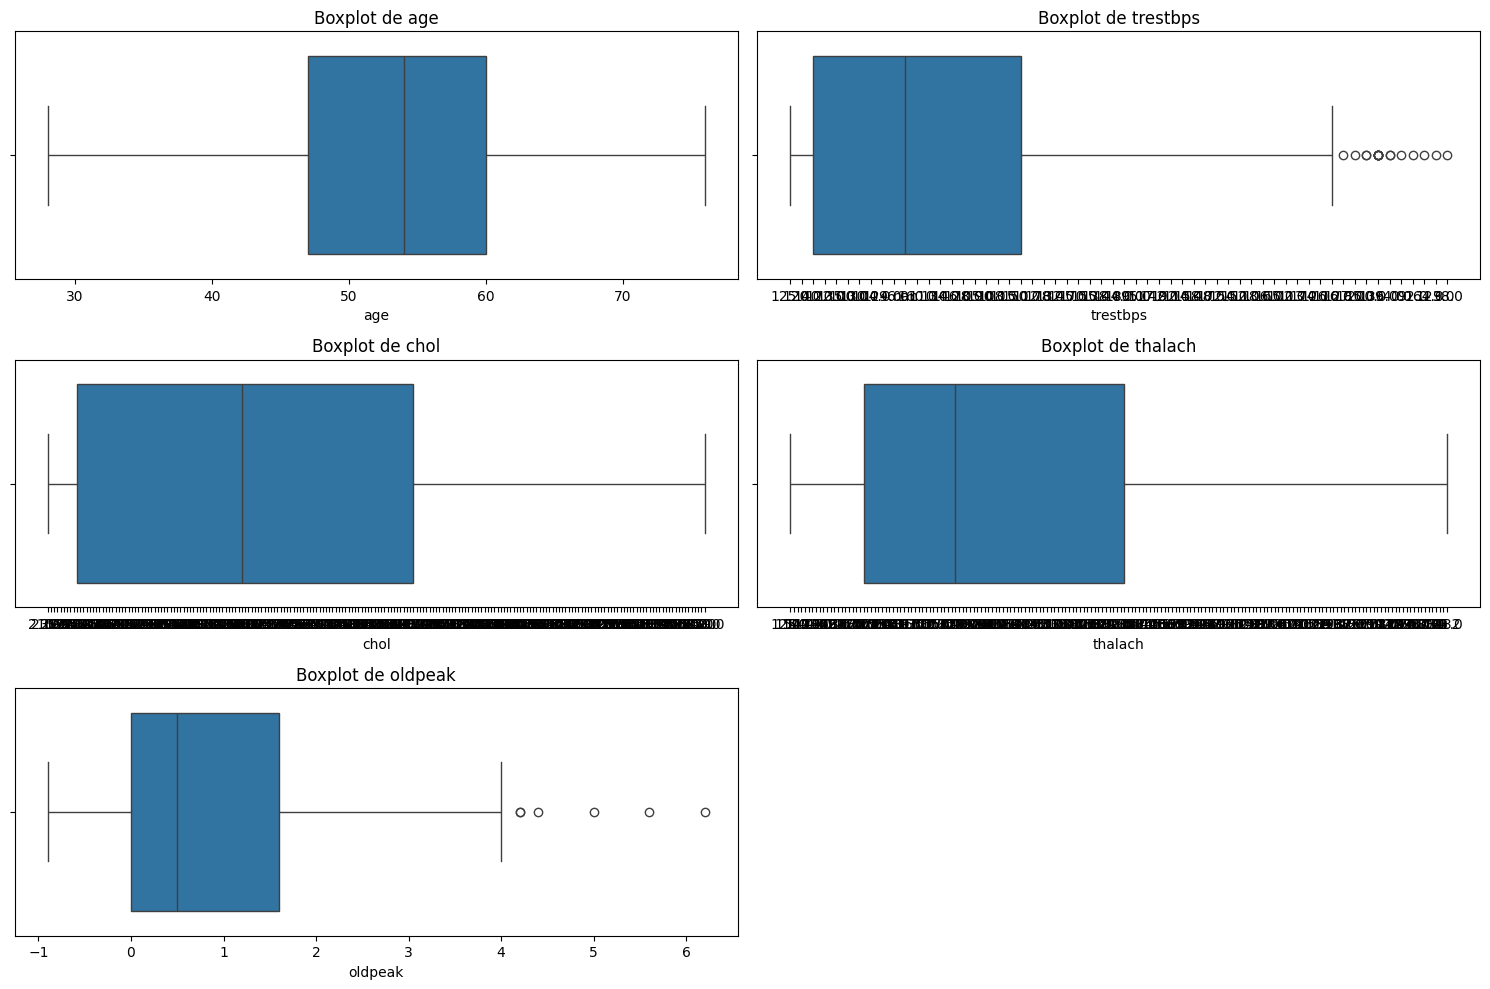

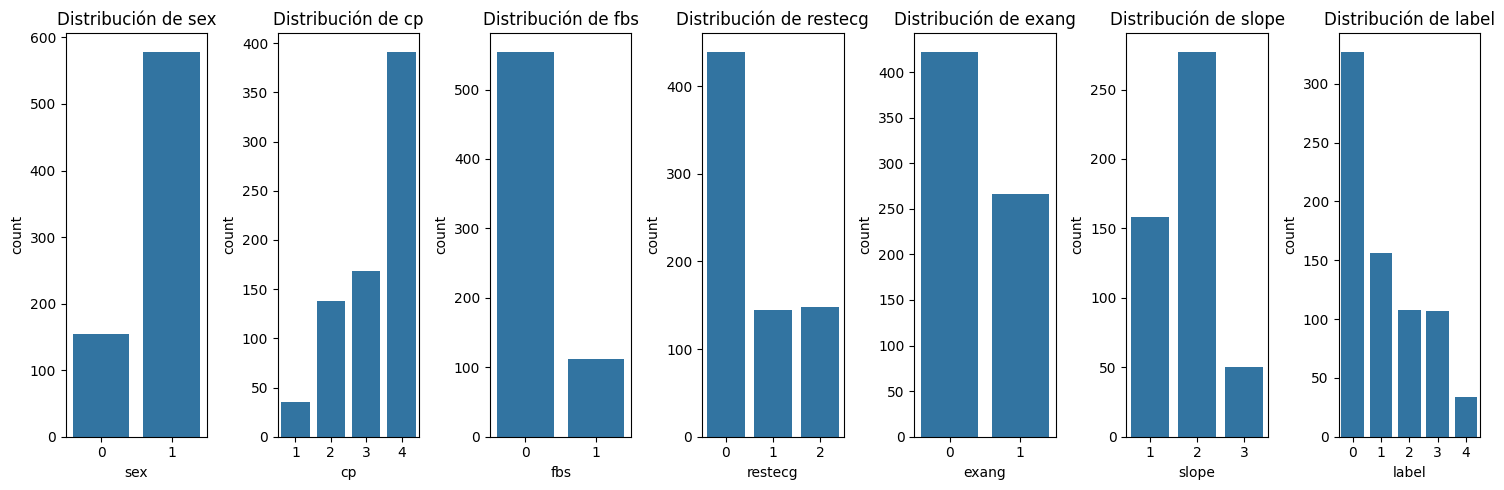

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1️⃣ Identificar columnas
# -------------------------
# Numéricas
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categóricas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'label']

# -------------------------
# 2️⃣ Distribución variables numéricas
# -------------------------
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# -------------------------
# 3️⃣ Distribución variables categóricas
# -------------------------
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(x=train[col])
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


In [11]:
# Reemplazar ambos por np.nan (opcional para unificar)
train = train.replace({pd.NA: np.nan})


In [ ]:
import pandas as pd

# Total de filas
total_filas = len(train)

# Calcular cantidad y porcentaje de NA por columna
na_por_columna = train.isna().sum()
porcentaje_na = (na_por_columna / total_filas * 100).round(2)

# Combinar en un DataFrame para mejor visualización
na_summary = pd.DataFrame({
    'Cantidad_NA': na_por_columna,
    'Porcentaje_NA': porcentaje_na
}).sort_values(by='Cantidad_NA', ascending=False)

print(na_summary)


          Cantidad_NA  Porcentaje_NA
ca                479          65.44
thal              379          51.78
slope             247          33.74
fbs                66           9.02
oldpeak            56           7.65
trestbps           47           6.42
thalach            44           6.01
exang              44           6.01
chol               21           2.87
age                 0           0.00
cp                  0           0.00
sex                 0           0.00
restecg             0           0.00
label               0           0.00


In [ ]:
print(train.head(10))

    age  sex  cp trestbps   chol   fbs  restecg thalach  exang  oldpeak  \
0  51.0    1   1    125.0  213.0     0        2   125.0      1      1.4   
1  54.0    1   3    120.0  237.0     0        0   150.0      1      1.5   
2  63.0    1   4    140.0    0.0  <NA>        2     149      0      2.0   
3  52.0    0   2    140.0    nan     0        0   140.0      0      0.0   
4  55.0    1   4    140.0  217.0     0        0   111.0      1      5.6   
5  44.0    1   4    120.0  169.0     0        0   144.0      1      2.8   
6  35.0    1   2    122.0  192.0     0        0   174.0      0      0.0   
7  62.0    1   4    135.0  297.0     0        0     130      1      1.0   
8  68.0    1   4    135.0    0.0     0        1     120      1      0.0   
9  50.0    1   4    140.0  231.0     0        1   140.0      1      5.0   

   slope   ca thal  label  
0      1  1.0  3.0      0  
1   <NA>  nan  7.0      2  
2      1  nan  nan      2  
3   <NA>  nan  nan      0  
4      3  0.0  7.0      3  
5     

In [ ]:
train = train.drop(columns=["ca", "thal"])


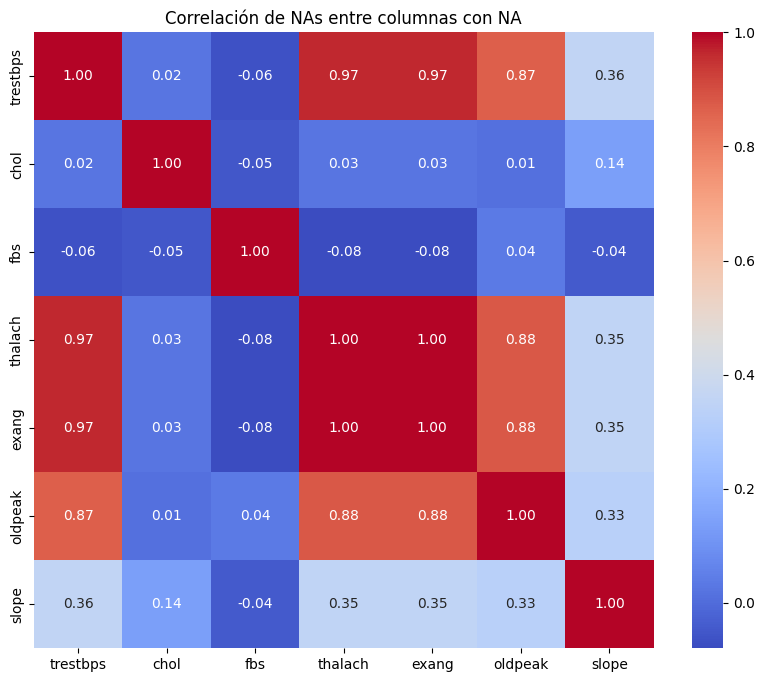

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas con al menos un NA
cols_with_na = train.columns[train.isna().any()]

# Crear dataframe binario de NAs solo para esas columnas
na_df = train[cols_with_na].isna().astype(int)

# Calcular la correlación
na_corr = na_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(na_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación de NAs entre columnas con NA")
plt.show()


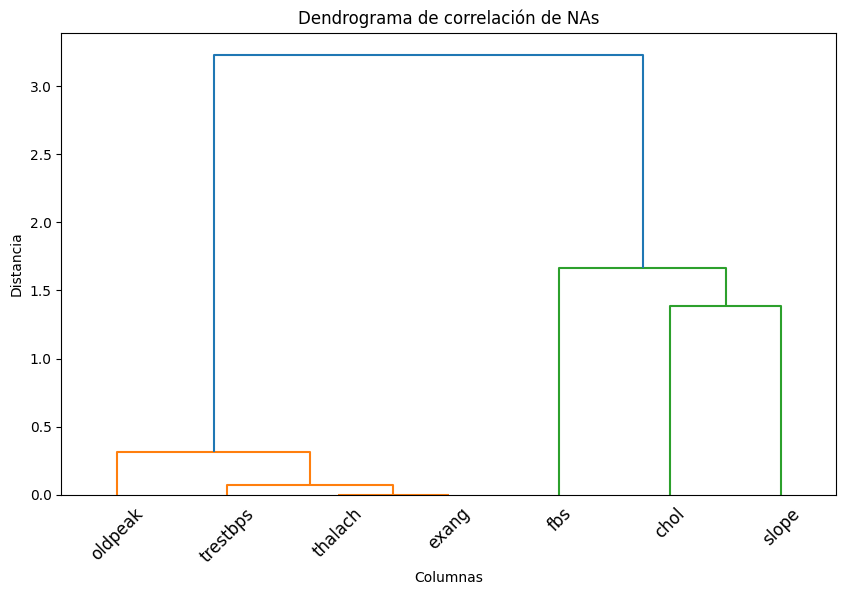

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

# ya tienes na_df con 1=NA, 0=valor presente
# Calcular la distancia entre columnas usando la correlación de NA
# Usamos 1 - correlación como medida de distancia
distance_matrix = 1 - na_df.corr()

# Clustering jerárquico
linked = sch.linkage(pdist(distance_matrix), method='ward')

# Dendrograma
plt.figure(figsize=(10, 6))
sch.dendrogram(linked,
               labels=na_df.columns,
               orientation='top',
               leaf_rotation=45)
plt.title("Dendrograma de correlación de NAs")
plt.xlabel("Columnas")
plt.ylabel("Distancia")
plt.show()


In [ ]:
cols_with_na = train.columns[train.isna().any()]

for col in cols_with_na:
    train[col + "_is_na"] = train[col].isna().astype(int)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_pca = ["oldpeak", "thalach", "exang", "trestbps"]

# 1️⃣ Imputar y escalar
X_pca = train[cols_pca].fillna(0)  # o con la estrategia que prefieras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# 2️⃣ Aplicar PCA (por ejemplo 1 componente)
pca = PCA(n_components=1)
train["PCA_na_pattern"] = pca.fit_transform(X_scaled)

# Ahora "PCA_na_pattern" captura la mayor parte de la variabilidad conjunta de estas columnas


In [ ]:
print(train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'label', 'trestbps_is_na', 'chol_is_na',
       'fbs_is_na', 'thalach_is_na', 'exang_is_na', 'oldpeak_is_na',
       'slope_is_na', 'PCA_na_pattern'],
      dtype='object')


In [ ]:
# Columnas originales con NAs que ya están resumidas en PCA
cols_to_drop = ["oldpeak_is_na", "thalach_is_na", "exang_is_na", "trestbps_is_na"]

# Eliminar columnas originales
train.drop(columns=cols_to_drop, inplace=True)

# Revisar las primeras filas
print(train.head())


    age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  51.0    1   1     125.0  213.0  0.0        2    125.0    1.0      1.4   
1  54.0    1   3     120.0  237.0  0.0        0    150.0    1.0      1.5   
2  63.0    1   4     140.0    0.0  NaN        2    149.0    0.0      2.0   
3  52.0    0   2     140.0    NaN  0.0        0    140.0    0.0      0.0   
4  55.0    1   4     140.0  217.0  0.0        0    111.0    1.0      5.6   

   slope  label  chol_is_na  fbs_is_na  slope_is_na  PCA_na_pattern  
0    1.0      0           0          0            0        0.661660  
1    NaN      2           0          0            1        0.933702  
2    1.0      2           0          1            0        0.709258  
3    NaN      0           1          0            1       -0.182401  
4    3.0      3           0          0            0        2.372706  


In [ ]:
print(train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'label', 'chol_is_na', 'fbs_is_na',
       'slope_is_na', 'PCA_na_pattern'],
      dtype='object')


chol              0.134817
thalach           0.130553
PCA_na_pattern    0.128121
age               0.125960
oldpeak           0.098861
trestbps          0.096838
cp                0.073814
slope             0.044920
exang             0.042379
restecg           0.038084
fbs               0.032228
sex               0.026228
slope_is_na       0.014267
fbs_is_na         0.009739
chol_is_na        0.003190
dtype: float64


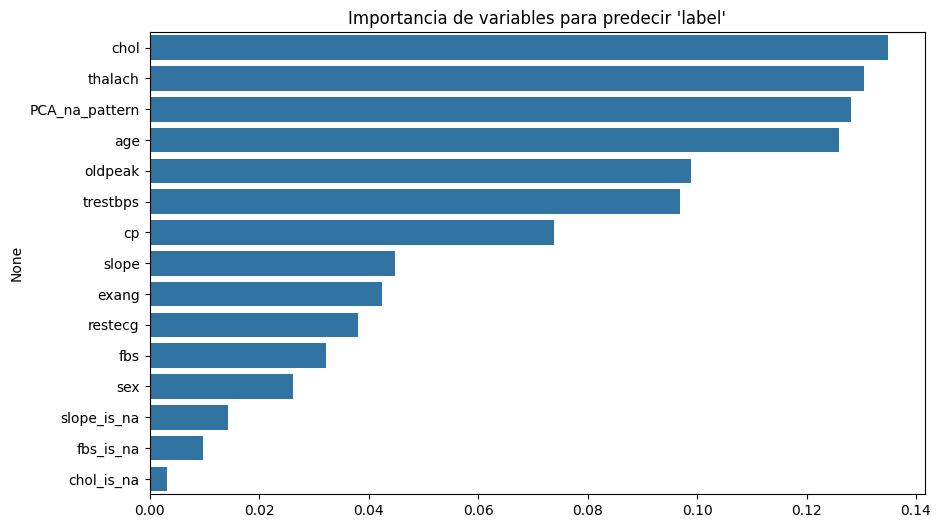

In [1]:
from sklearn.ensemble import RandomForestClassifier

# Separar features y target
X = train.drop(columns=["label"])
y = train["label"]

# Entrenar un Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Importancia de las variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Mostrar
print(importances)

# Visualizar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importancia de variables para predecir 'label'")
plt.show()


Ahora voy a trabajar, los NA, primero para los numéricos voy a hacer el iterative imputer.

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# -------------------------------
# 1️⃣ Seleccionar columnas numéricas (excluyendo label)
# -------------------------------
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)
num_cols = [col for col in num_cols if col != 'label']

# -------------------------------
# 2️⃣ Crear el imputador iterativo
# -------------------------------
imputer = IterativeImputer(random_state=42)

# -------------------------------
# 3️⃣ Ajustar y transformar solo las numéricas
# -------------------------------
train_num_imputed_array = imputer.fit_transform(train[num_cols])

# -------------------------------
# 4️⃣ Volver a dataframe
# -------------------------------
train[num_cols] = pd.DataFrame(train_num_imputed_array, columns=num_cols, index=train.index)

# -------------------------------
# 5️⃣ Revisar resultado
# -------------------------------
print(train[num_cols].isna().sum())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'label', 'chol_is_na', 'fbs_is_na', 'slope_is_na', 'PCA_na_pattern']
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
chol_is_na        0
fbs_is_na         0
slope_is_na       0
PCA_na_pattern    0
dtype: int64


In [ ]:
for col in train.columns:
    na_count = train[col].isna().sum()
    na_pct = train[col].isna().mean() * 100
    print(f"{col}: {na_count} {na_pct:.2f}%")


age: 0 0.00%
sex: 0 0.00%
cp: 0 0.00%
trestbps: 0 0.00%
chol: 0 0.00%
fbs: 0 0.00%
restecg: 0 0.00%
thalach: 0 0.00%
exang: 0 0.00%
oldpeak: 0 0.00%
slope: 0 0.00%
label: 0 0.00%
chol_is_na: 0 0.00%
fbs_is_na: 0 0.00%
slope_is_na: 0 0.00%
PCA_na_pattern: 0 0.00%


In [ ]:
# Mostrar tipo de cada columna
print("Tipo de variable por columna:")
print(train.dtypes)


Tipo de variable por columna:
age               float64
sex               float64
cp                float64
trestbps          float64
chol              float64
fbs               float64
restecg           float64
thalach           float64
exang             float64
oldpeak           float64
slope             float64
label               int64
chol_is_na        float64
fbs_is_na         float64
slope_is_na       float64
PCA_na_pattern    float64
dtype: object


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# -------------------------------
# 1️⃣ Columnas categóricas con pocos NAs (<10%)
# -------------------------------
low_na_cols = ["fbs", "thalach", "exang", "oldpeak"]

for col in low_na_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

# -------------------------------
# 2️⃣ Preparar los datos para predecir slope
# -------------------------------
# Dividir filas donde slope es conocido y donde es NA
slope_known = train[train["slope"].notna()]
slope_missing = train[train["slope"].isna()]

# Features: todas menos slope
feature_cols = [c for c in train.columns if c != "slope"]

X_train_slope = slope_known[feature_cols]
y_train_slope = slope_known["slope"]

X_pred_slope = slope_missing[feature_cols]

# Codificar categóricas como enteros para Random Forest
cat_cols = X_train_slope.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    # Crear diccionario de mapeo
    mapping = {v: i for i, v in enumerate(X_train_slope[col].unique())}
    X_train_slope[col] = X_train_slope[col].map(mapping)
    X_pred_slope[col] = X_pred_slope[col].map(mapping)

# -------------------------------
# 3️⃣ Entrenar Random Forest
# -------------------------------
rf_slope = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_slope.fit(X_train_slope, y_train_slope)

# -------------------------------
# 4️⃣ Predecir los NA de slope
# -------------------------------
slope_missing["slope"] = rf_slope.predict(X_pred_slope)

# -------------------------------
# 5️⃣ Combinar de nuevo con el dataframe original
# -------------------------------
train.loc[train["slope"].isna(), "slope"] = slope_missing["slope"]

# -------------------------------
# 6️⃣ Revisar que no queden NA
# -------------------------------
print(train[["fbs", "thalach", "exang", "oldpeak", "slope"]].isna().sum())


/tmp/ipython-input-186152282.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Cantidad de NAs por columna
na_count = train.isna().sum()
print("Cantidad de NAs por columna:")
print(na_count)

# Opcional: porcentaje de NAs por columna
na_pct = (train.isna().mean() * 100)
print("\nPorcentaje de NAs por columna:")
print(na_pct)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1️⃣ Identificar columnas numéricas y categóricas
# -------------------------------
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [col for col in num_cols if col != 'label']  # excluir label

cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# -------------------------------
# 2️⃣ Distribución de variables numéricas
# -------------------------------
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

# Boxplots de variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ Distribución de variables categóricas
# -------------------------------
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, len(cat_cols), i)
    sns.countplot(x=train[col])
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


In [ ]:
print()